In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
# Load tha data for the pose
poseName = 'Retire'
loaded = np.load("RootCoordinates/"+poseName+'X.npy')
print("Loaded: ",loaded)
print("Length:", len(loaded))

Loaded:  [[0.489774 0.284766 0.916418 ... 0.520393 0.739914 0.842526]
 [0.493769 0.284897 0.893677 ... 0.520352 0.742638 0.865259]
 [0.489759 0.28487  0.896611 ... 0.520349 0.742721 0.86492 ]
 ...
 [0.481682 0.30923  0.898575 ... 0.530618 0.747905 0.795508]
 [0.481658 0.303868 0.898717 ... 0.53067  0.747903 0.822877]
 [0.483563 0.306545 0.899593 ... 0.532487 0.745286 0.793008]]
Length: 870


870


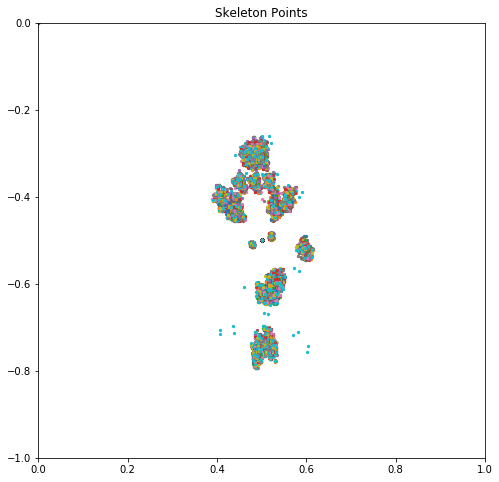

In [3]:
count = 0
def plotCoordinates():
    fig, ax = plt.subplots(1, figsize=(8,8))
    plt.title('Skeleton Points')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global count
    for list in loaded:
        x = list[0::3]
        posY = list[1::3]
        y = [-y for y in posY] #need to make the loaded y values negative for plotting correctly.
        c = list[2::3]
        sc = ax.scatter(x,y,s=5)
        count+=1
plotCoordinates()
print(count)

870


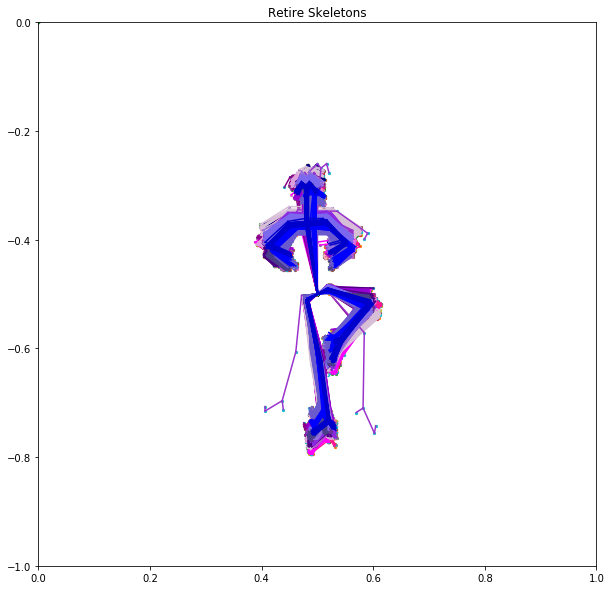

In [4]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']

allXList =[]
allYList = []
allCList=[]

dancerNum = 0
count = 0
def plotSkeletons():
    fig,ax = plt.subplots(1,figsize = (10,10))
    plt.title(poseName +' Skeletons')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global dancerNum
    global count
    for list in loaded:
        x = list[0::3]
        allXList.append(x)# all x values per sample
        posY = list[1::3]
        y = [-y for y in posY]# all y values per sample
        allYList.append(y) # the negative values get saved as the mean skeleton.
        c = list[2::3]
        allCList.append(c)# all c values per sample
        sc = ax.scatter(x,y,s=5)
        for bone in bones:
            if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                continue
                
            ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]],penColor[dancerNum-1])
        count+=1
        if count%30 == 0:
            dancerNum+=1
            #print(dancerNum)
plotSkeletons()
print(count)

In [5]:
#Save the split up lists in XYCSplitListsDirectory
np.save('XYCSplitLists/all'+poseName+'XList.npy', allXList)
np.save('XYCSplitLists/all'+poseName+'YList.npy', allYList)
np.save('XYCSplitLists/all'+poseName+'CList.npy', allCList)

xloaded = np.load('XYCSplitLists/all'+poseName+'XList.npy')
print(xloaded)
yloaded = np.load('XYCSplitLists/all'+poseName+'YList.npy')
print(yloaded)
cloaded = np.load('XYCSplitLists/all'+poseName+'CList.npy')
print(xloaded)

[[0.489774 0.485763 0.455014 ... 0.493877 0.491777 0.520393]
 [0.493769 0.48765  0.454979 ... 0.493766 0.489736 0.520352]
 [0.489759 0.485749 0.454974 ... 0.493783 0.489736 0.520349]
 ...
 [0.481682 0.48168  0.449039 ... 0.491925 0.49593  0.530618]
 [0.481658 0.481674 0.44898  ... 0.493935 0.495963 0.53067 ]
 [0.483563 0.483569 0.450932 ... 0.495823 0.497828 0.532487]]
[[-0.284766 -0.350373 -0.350351 ... -0.75892  -0.745464 -0.739914]
 [-0.284897 -0.353031 -0.353022 ... -0.761544 -0.748086 -0.742638]
 [-0.28487  -0.353096 -0.353085 ... -0.761609 -0.748158 -0.742721]
 ...
 [-0.30923  -0.369285 -0.374607 ... -0.756219 -0.753402 -0.747905]
 [-0.303868 -0.369243 -0.371935 ... -0.753524 -0.750714 -0.747903]
 [-0.306545 -0.3666   -0.369309 ... -0.75355  -0.75073  -0.745286]]
[[0.489774 0.485763 0.455014 ... 0.493877 0.491777 0.520393]
 [0.493769 0.48765  0.454979 ... 0.493766 0.489736 0.520352]
 [0.489759 0.485749 0.454974 ... 0.493783 0.489736 0.520349]
 ...
 [0.481682 0.48168  0.449039 ...

In [6]:
# Now calculate mean skeleton:
sumXList = [sum(i) for i in zip(*allXList)]# the * indicates the use of iterables
sumYList = [sum(j) for j in zip(*allYList)]
sumCList =[sum(k) for k in zip(*allCList)]
print(sumXList)
print(sumYList)
print(sumCList)

#Get the average: sum/count - count calculated in cell 2 of this notebook = number of samples.
avgXList = [sx / count for sx in sumXList]
avgYList = [sy / count for sy in sumYList]
avgCList =[sc / count for sc in sumCList]
print(avgXList)
print(avgYList)
print(avgCList)

[421.09625199999994, 421.08889000000005, 392.6524680000003, 356.6175819999998, 383.7691970000008, 449.1688039999999, 485.5505699999999, 459.0793290000001, 435.0, 417.17766999999986, 435.3529260000001, 448.42480999999896, 452.5421940000006, 518.2047869999996, 464.27557200000075, 414.83643500000017, 427.3264289999997, 406.50263100000035, 436.12488899999965, 455.1849870000002, 450.7812140000001, 454.671421, 426.60494200000005, 425.43554400000016, 454.2102530000002]
[-261.59389300000015, -319.2640289999997, -319.972876, -354.4701699999996, -370.95732599999997, -318.0930649999999, -352.2692140000003, -368.09167200000024, -435.0, -442.83722199999977, -540.5411889999993, -639.6681310000004, -427.71361900000034, -452.2704279999999, -514.2221239999999, -254.68980199999996, -254.55665300000015, -266.2147549999998, -265.53082799999993, -539.1073589999997, -533.0123070000002, -514.3382549999999, -661.2455639999993, -655.5423250000001, -649.3484840000006]
[786.0067310000007, 781.9356869999992, 763.

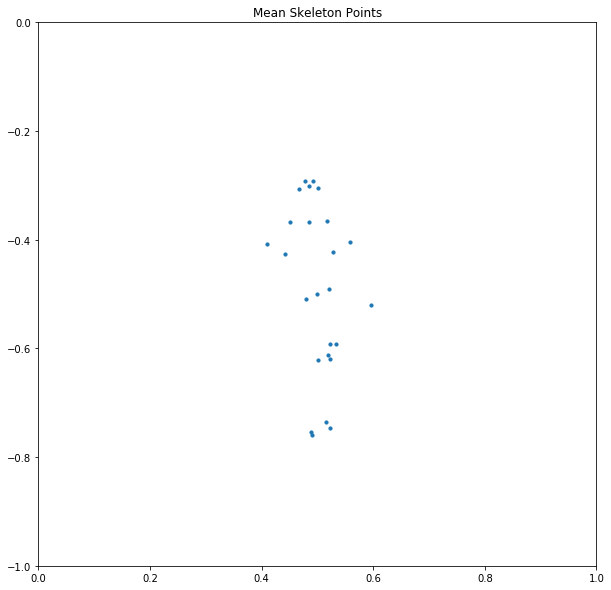

In [7]:
#Plot mean skeleton:
def plotMeanCoordinates():
    fig, ax = plt.subplots(1, figsize=(10,10))
    plt.title('Mean Skeleton Points')
    plt.xlim(0, 1)
    plt.ylim(-1, 0)
    sc = ax.scatter(avgXList,avgYList, s=10)
    #for bone in bones:
        #if avgXList[bone[0]]== 0.0 or avgYList[bone[0]] == 0.0  or avgXList[bone[1]] == 0.0 or avgYList[bone[1]] == 0.0:
            #print("zero values for joint: ",avgXList.index(avgXList[bone[0]]))
            #print("zero values for joint: ",avgXList.index(avgXList[bone[1]]))
        #ax.plot([avgXList[bone[0]],avgXList[bone[1]]],[avgYList[bone[0]],avgYList[bone[1]]])
plotMeanCoordinates()

In [8]:
#calculation of standard deviation values:
import statistics

In [9]:
standardDeviationX = [statistics.stdev(i) for i in zip(*allXList)]
standardDeviationY = [statistics.stdev(i) for i in zip(*allYList)]
standardDeviationC = [statistics.stdev(i) for i in zip(*allCList)]

print("Standard Deviations of X values:",standardDeviationX)
print("Standard Deviations of Y values:",standardDeviationY)
print("Standard Deviations of C values:",standardDeviationC)

Standard Deviations of X values: [0.005471431250385588, 0.0046859440334949464, 0.0053477484302657495, 0.007832632216917433, 0.00960390442038254, 0.0046072204703337186, 0.006818053075528567, 0.00821020580028155, 0.0, 0.0025882175244744295, 0.004894920256822778, 0.005268766316053646, 0.0022094412137454405, 0.0061022789752669, 0.02650262716269443, 0.005654175926499624, 0.005132046388409249, 0.005705369339661049, 0.005300162071961569, 0.026017362467394715, 0.06421757885312657, 0.025823670590216112, 0.017611594497976467, 0.017433790246084258, 0.006080436161835165]
Standard Deviations of Y values: [0.01289599233352722, 0.008151906374698835, 0.008350708300664766, 0.011769327364159957, 0.01585133958027331, 0.008548969728144338, 0.010449435872381271, 0.016253024214811986, 0.0, 0.0033673737884906806, 0.008334987071821986, 0.014617149060756581, 0.004167613135702217, 0.010871819429933033, 0.03026859692587641, 0.011914634440152212, 0.012192164161913512, 0.011704573155716366, 0.01207721813137585, 0.

In [10]:
#plot standard deviation coordinates?
print(len(standardDeviationX))
print(len(avgXList))

25
25


In [11]:
np.save('Stats/'+poseName+'StdDevX.npy', standardDeviationX)
np.save('Stats/'+poseName+'StdDevY.npy', standardDeviationY)
np.save('Stats/'+poseName+'StdDevC.npy', standardDeviationY)
np.save('Stats/'+poseName+'MeanX.npy', avgXList)
np.save('Stats/'+poseName+'MeanY.npy', avgYList)
np.save('Stats/'+poseName+'MeanC.npy', avgCList)